# Лабораторная работа №2 Введение в pytorch
## Чередова Александра Вариант 18

In [4]:
import torch
import numpy as np

In [5]:
x = np.arange(16).reshape(4, 4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {np.dot(x, x.T)}')
print(f'mean over cols :\n {x.mean(axis=-1)}')
print(f'cumsum of cols :\n {np.cumsum(x, axis=0)}' )

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
 [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
 [ 1.5  5.5  9.5 13.5]
cumsum of cols :
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [6]:
x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {torch.matmul(x, x.transpose(1, 0))}')
print(f'mean over cols :\n {torch.mean(x, dim=-1)}')
print(f'cumsum of cols :\n {torch.cumsum(x, dim=0)}')


X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


In [7]:
# тензор значений, равномерно распределенных между 0 и 2*pi
x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)

# Вычисляем sin^2(x) + cos^2(x)
out = torch.sin(x)**2 + torch.cos(x)**2

# Преобразование тензора в массив NumPy
print(out.numpy())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
a = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(a)

tensor([1., 2., 3.], requires_grad=True)


In [9]:
# 1. Создаем тензор с requires_grad=True
a = torch.tensor([2.0], requires_grad=True)

# 2. Определяем дифференцируемую функцию потерь
# Пример: loss = (a - 5)^2
loss = (a - 5)**2

# 3. Выполняем обратный проход
loss.backward()

# 4. Доступ к градиентам
print(a.grad)  # Вывод: градиент функции потерь по переменной a

tensor([-6.])


### Leaf vs Non-leaf Variable:
**x = torch.tensor([1., 2., 3., 4.], requires_grad=True))  # leaf tensor**

**y = x + 1  # not a leaf variable**

Градиенты будут сохранены и доступны для использования только для leaf tensor. Такое поведение по-умолчанию сделано ради экономии памяти. Все тензоры с флагом **requires_grad = False** считаются **leaf tensors** по умолчанию.

Чтобы выставить флаг requires_grad=False и выключить автоматическое вычисление градиентов для нескольких тензоров, можно использовать **with torch.no_grad()** или **detach**:

In [10]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)
    
# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


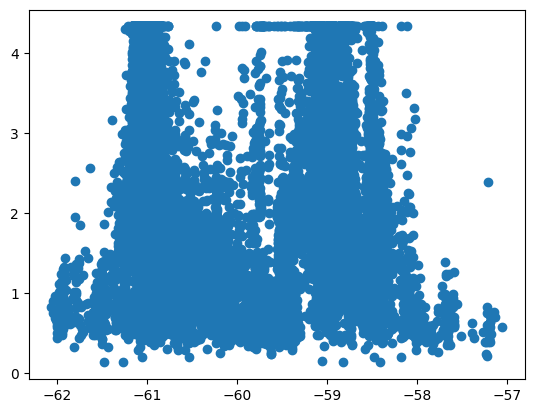

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#select one column for simplicity. 
x = X[:, -1] / X[:, -1].std()
y = y / y.std()

plt.scatter(x, y);

In [12]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


### Градиенты промежуточных функций

In [13]:
y_pred = w * x + b

# check this:
y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

Non-Leaf loss dL/dpred = 
 tensor([-0.0004, -0.0003, -0.0003, -0.0003, -0.0003, -0.0002, -0.0003, -0.0002,
        -0.0002, -0.0002])


### Линейная регрессия

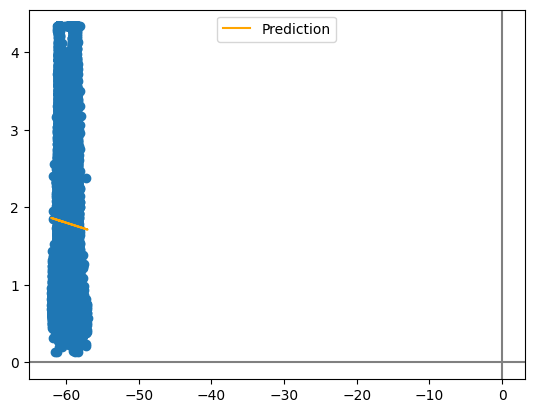

loss =  0.9981409311294556


In [14]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#x и y - это подготовленные тензоры данных

for i in range(1000):
    
    # Вычисление потерь
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # Обратное распространение
    loss.backward()
    
    # Шаг градиентного спуска для весов
    with torch.no_grad():
        w -= 0.000007 * w.grad
        b -= 0.000007 * b.grad
    
    # Обнуление градиентов
    w.grad.zero_()
    b.grad.zero_()
    
    # Визуализация результатов на каждом пятом шаге
    if (i + 1) % 5 == 0:
        clear_output(wait=True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.detach().numpy(), color='orange', label='Prediction')
        plt.legend()
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.8:
            print("Done!")
            break

В целях улучшения читабельности графика для этих данных можно использовать функции plt.xlim() и plt.ylim() из библиотеки Matplotlib для явного задания границ осей X и Y соответственно. 

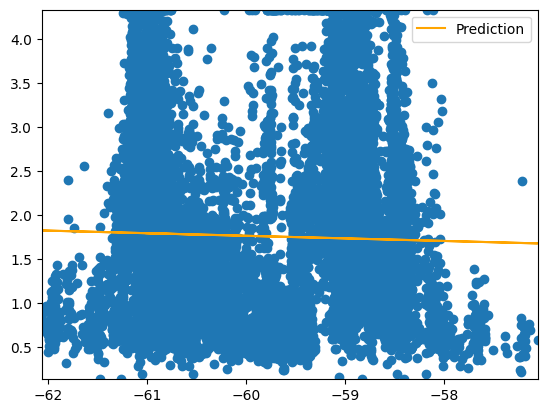

loss =  0.9997912645339966
Done!


In [15]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import numpy as np

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Предполагается, что x и y - это подготовленные тензоры данных

for i in range(100):
    
    # Вычисление потерь
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # Обратное распространение
    loss.backward()
    
    # Шаг градиентного спуска для весов
    with torch.no_grad():
        w -= 0.000007 * w.grad
        b -= 0.000007 * b.grad
    
    # Обнуление градиентов
    w.grad.zero_()
    b.grad.zero_()
    
    # Визуализация результатов на каждом пятом шаге
    if (i + 1) % 5 == 0:
        clear_output(wait=True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        
        # Настройка диапазонов осей
        plt.xlim(np.min(x.numpy()), np.max(x.numpy()))
        
        combined_y = np.hstack([y.numpy(), y_pred.detach().numpy()])
        plt.ylim(np.min(combined_y), np.max(combined_y))
        
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.detach().numpy(), color='orange', label='Prediction')
        plt.legend()
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 1:
            print("Done!")
            break

 ### Оптимизаторы

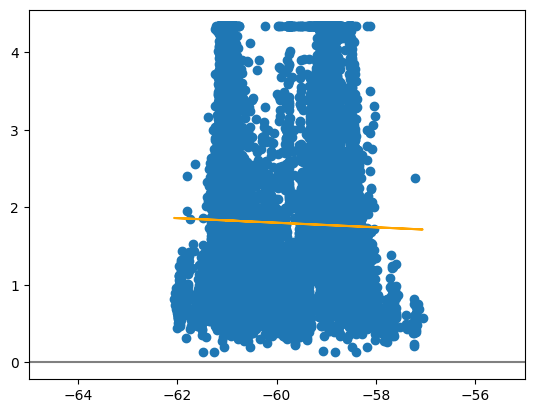

loss =  0.9981564283370972


In [16]:
# from sklearn.datasets import load_boston

# датасет load_boston был удален по этическим соображениям, поэтому используем fetch_california_housing
x, y = fetch_california_housing(return_X_y=True)
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# define optimizer
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y) ** 2) #######
    
    # backprop and gradient descent
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.xlim(-65, -55) 
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

### Высокоуровневые API

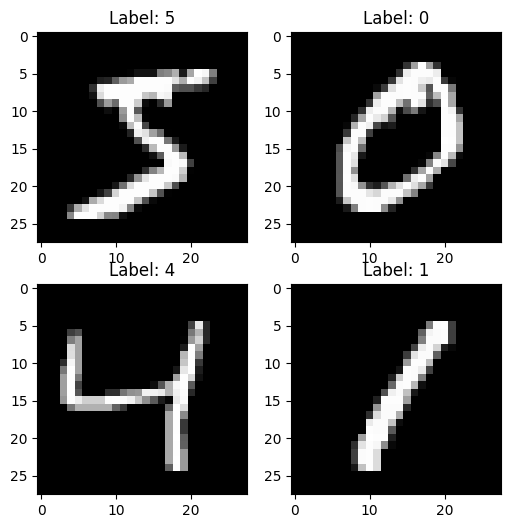

In [17]:
# MNIST 
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Label: {y_train[i]}")
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

In [18]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # check log_softmax signature
        return F.log_softmax(x, dim=-1)
    # backward function computes automaticaly

In [19]:
# model interface:
model = Net()
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)
# Получаем вероятности из output с помощью экспоненциальной функции, поскольку output - это логарифм вероятностей
probs = torch.exp(output)
print('Probs: \n', probs)

# Получаем предсказания из output, выбирая индекс с наибольшим значением в каждой строке
# Это эквивалентно выбору класса с наибольшей вероятностью
pred = torch.argmax(output, dim=1)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:10])

Model outputs: 
 tensor([[-2.2803, -2.4736, -2.2017, -2.1873, -2.2128, -2.0918, -2.4576, -2.4056,
         -2.4154, -2.3797],
        [-2.2909, -2.4804, -2.1765, -2.1646, -2.2333, -2.0844, -2.4437, -2.4086,
         -2.4215, -2.4107],
        [-2.3126, -2.4439, -2.2037, -2.1916, -2.2053, -2.0961, -2.4119, -2.3687,
         -2.4416, -2.4233],
        [-2.2785, -2.4879, -2.1796, -2.1807, -2.2135, -2.1028, -2.4225, -2.4187,
         -2.4208, -2.4035],
        [-2.2584, -2.4819, -2.1690, -2.1754, -2.2420, -2.1027, -2.4264, -2.3883,
         -2.4293, -2.4369],
        [-2.2701, -2.5136, -2.1546, -2.1593, -2.2529, -2.0821, -2.4383, -2.4273,
         -2.4414, -2.3863],
        [-2.2722, -2.4526, -2.2266, -2.1845, -2.2076, -2.0993, -2.4391, -2.3715,
         -2.4253, -2.4204],
        [-2.2781, -2.5009, -2.1751, -2.1653, -2.2313, -2.0928, -2.4363, -2.4206,
         -2.4150, -2.3997],
        [-2.2677, -2.4503, -2.2350, -2.2023, -2.2215, -2.0880, -2.4361, -2.3646,
         -2.4181, -2.4117],
  

 ### Тренировка сети

In [20]:
from IPython.display import clear_output
from tqdm.auto import tqdm

# функция для итераций по минибатчам
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

C:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)
    return loss_log

def test(model):
    loss_log = []
    model.eval()# переключаем модель в режим предсказания
    with torch.no_grad():  # отключаем вычисление градиентов
        for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=32, shuffle=False):
            data = torch.from_numpy(x_batch.astype(np.float32))
            target = torch.from_numpy(y_batch.astype(np.int64))
            output = model(data)
            loss = F.nll_loss(output, target)  # вычисляем потерю
            loss_log.append(loss.item())  # сохраняем значение потери
    return np.mean(loss_log)  # возвращаем среднее значение потери на валидационном наборе


### Визуализация истории обучения

In [22]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.plot(train_history, label='train')
    plt.plot(np.linspace(0, len(train_history), len(val_history)), val_history, label='val', color='orange')
    plt.title(title)
    plt.xlabel('Training steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

### Обучение и физуализация обучения

Epoch 10
Train loss: 0.04916127761407435
Val loss: 0.10973496416763504


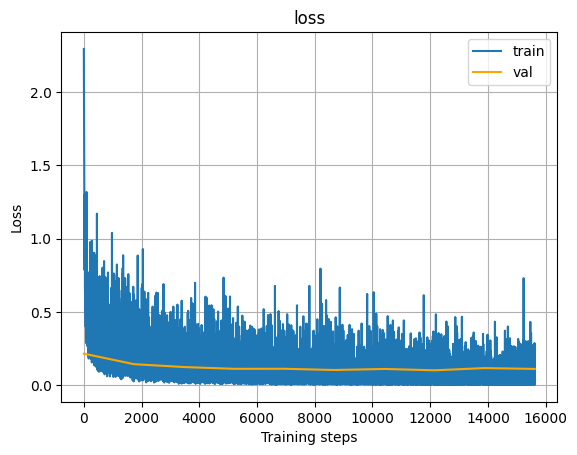

In [23]:
train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss = train(model, opt, batchsize=batchsize)
    train_log.extend(train_loss)
    
    val_loss = np.mean(test(model))
    val_log.append(val_loss)  # сохраняем среднее значение потери на валидации
    
    clear_output(wait=True)
    print(f"Epoch {epoch+1}")
    print(f"Train loss: {np.mean(train_loss)}")
    print(f"Val loss: {val_loss}")
    plot_history(train_log, val_log)  # визуализируем историю обучения и отслеживаем процедуру тренировки

### Метрики

Epoch 10
Train loss: 0.07384139427181248, Train accuracy: 0.9768725992317542
Val loss: [0.11175201088190079, 0.0248196292668581, 0.18696419894695282, 0.019918423146009445, 0.05114734172821045, 0.026373837143182755, 0.24397225677967072, 0.4577191174030304, 0.008431603200733662, 0.14869384467601776, 0.35073038935661316, 0.10426216572523117, 0.3134646713733673, 0.485664039850235, 0.03974059596657753, 0.03456671163439751, 0.601641833782196, 0.3377455472946167, 0.07123202830553055, 0.09207794815301895, 0.053827304393053055, 0.0665772557258606, 0.22071629762649536, 0.042222749441862106, 0.08256068080663681, 0.1302824318408966, 0.07461046427488327, 0.2567010819911957, 0.26906025409698486, 0.017598243430256844, 0.04676806926727295, 0.007302543148398399, 0.02286730520427227, 0.04237230867147446, 0.01188618689775467, 0.01848571188747883, 0.10853233933448792, 0.01030741911381483, 0.11132703721523285, 0.10840252041816711, 0.18388447165489197, 0.05021677166223526, 0.17742086946964264, 0.01628369465

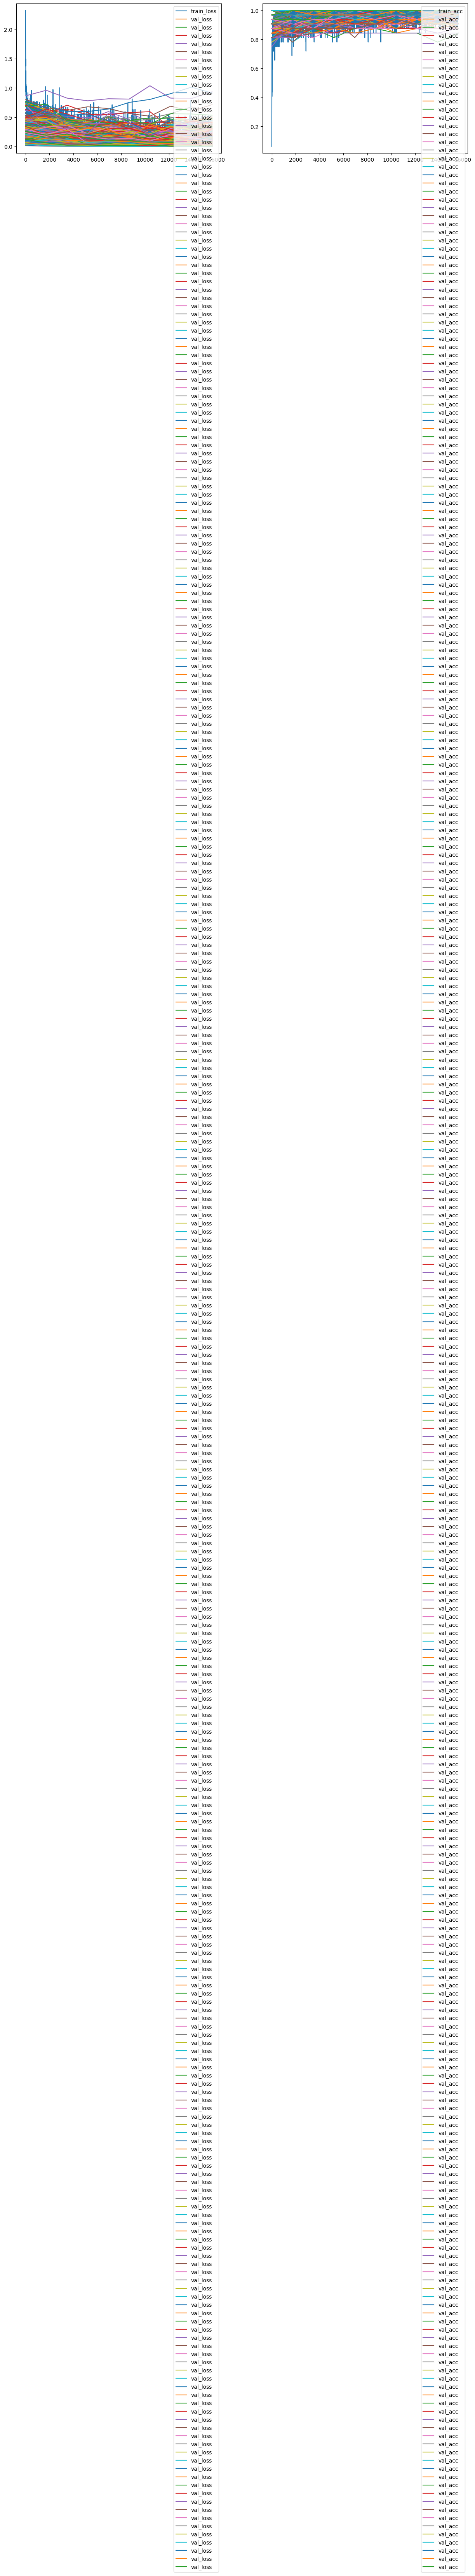

In [24]:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        preds = torch.argmax(output, dim=1)
        accuracy = torch.mean((preds == target).float())
        
        loss_log.append(loss.item())
        acc_log.append(accuracy.item())
    
    return loss_log, acc_log


def test(model):
    loss_log, acc_log = [], []
    
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=32, shuffle=False):
            data = torch.from_numpy(x_batch.astype(np.float32))
            target = torch.from_numpy(y_batch.astype(np.int64))
            
            output = model(data)
            loss = F.nll_loss(output, target)
            
            preds = torch.argmax(output, dim=1)
            accuracy = torch.mean((preds == target).float())
            
            loss_log.append(loss.item())
            acc_log.append(accuracy.item())
    
    return loss_log, acc_log



def plot_history(loss_log, acc_log, val_loss_log, val_acc_log):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_log, label='train_loss')
    plt.plot(np.linspace(0, len(loss_log), len(val_loss_log)), val_loss_log, label='val_loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(acc_log, label='train_acc')
    plt.plot(np.linspace(0, len(acc_log), len(val_acc_log)), val_acc_log, label='val_acc')
    plt.legend()
    
    plt.show()


train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32


for epoch in range(10):
    train_loss, train_acc = train(model, opt, batchsize=batchsize)
    val_loss, val_acc = test(model)
    
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)
    
    clear_output(wait=True)
    print(f"Epoch {epoch+1}")
    print(f"Train loss: {np.mean(train_loss)}, Train accuracy: {np.mean(train_acc)}")
    print(f"Val loss: {val_loss}, Val accuracy: {val_acc}")
    plot_history(train_log, train_acc_log, val_log, val_acc_log)
    

### Загрузчик данных

In [ ]:
import requests, zipfile, io

url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall()  # Распаковать в текущую директорию

In [25]:
%matplotlib inline

import time
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()
plt.ion()

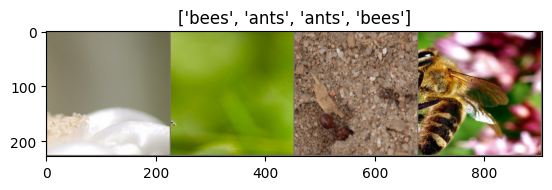

In [26]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
 # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [31]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:

                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        scheduler.step()  # Update the learning rate scheduler

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [32]:
# torchvision содержит ряд моделей с претрейненными весами:
[m for m in dir(models) if not m.startswith('_')]

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [33]:
model_ft = models.resnet18(pretrained=True)
# hint: вы можете изучить устройство любого объекта в python пользуясь интерактивностью интерпретатора и методом dir()

# Список слоев модели можно получить с помощью обхода
# for x in model_ft.named_modules():
#    print(x[0], x[1])


# TODO: подмените в модели последний слой, чтобы она работала для двух классов

from torchvision import models
import torch.nn as nn

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

# TODO: выберите, какие параметры дообучать. Результат получается лучше если дообучать всё или только последний слой? Почему?
# например, выключить обучение всех параметров можно при помощи этого кода:
for param in model_ft.parameters():
    param.requires_grad = False

# Помечаем параметры последнего слоя как требующие градиент
for param in model_ft.fc.parameters():
    param.requires_grad = True

# Передаем в оптимизатор параметры последнего слоя, поскольку только они требуют градиенты
params_to_train = list(model_ft.fc.parameters())

# Создаем оптимизатор для этих параметров
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# for param in model_ft.parameters():
#     param.requires_grad = False

# # Только параметры последнего слоя участвуют в обучении
# params_to_train = model_ft.fc.parameters()
# optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# use GPU if you have it
if use_gpu:
    model_ft = model_ft.cuda()

# loss
criterion = nn.CrossEntropyLoss()

# Create optimizer on the selected parameters
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
# если всё сделано правильно, то точность на валидации должна быть больше 94%

Epoch 0/24
----------
train Loss: 0.7193 Acc: 0.5246
val Loss: 0.6284 Acc: 0.6667

Epoch 1/24
----------
train Loss: 0.6889 Acc: 0.5697
val Loss: 0.6294 Acc: 0.6536

Epoch 2/24
----------
train Loss: 0.6736 Acc: 0.5451
val Loss: 0.6196 Acc: 0.6732

Epoch 3/24
----------
train Loss: 0.6757 Acc: 0.5615
val Loss: 0.6699 Acc: 0.6013

Epoch 4/24
----------
train Loss: 0.6865 Acc: 0.5410
val Loss: 0.6057 Acc: 0.7059

Epoch 5/24
----------
train Loss: 0.6684 Acc: 0.5943
val Loss: 0.6421 Acc: 0.6340

Epoch 6/24
----------
train Loss: 0.6905 Acc: 0.5574
val Loss: 0.6269 Acc: 0.6471

Epoch 7/24
----------
train Loss: 0.6745 Acc: 0.5779
val Loss: 0.5997 Acc: 0.7124

Epoch 8/24
----------
train Loss: 0.6785 Acc: 0.5820
val Loss: 0.6147 Acc: 0.6667

Epoch 9/24
----------
train Loss: 0.6941 Acc: 0.5656
val Loss: 0.6337 Acc: 0.6405

Epoch 10/24
----------
train Loss: 0.6744 Acc: 0.5861
val Loss: 0.6369 Acc: 0.6144

Epoch 11/24
----------
train Loss: 0.6612 Acc: 0.6025
val Loss: 0.6378 Acc: 0.6471

Ep

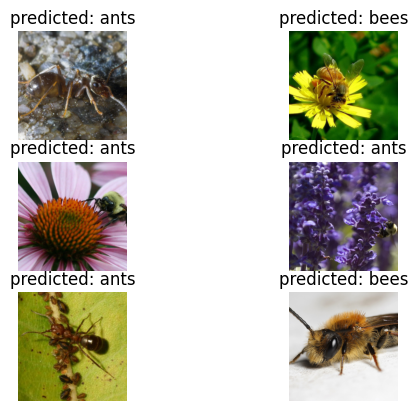

In [34]:
# TODO: напишите функцию, прогоняющую модель на нескольких примерах из валидационной выборки
# Отобразите картинки и предсказания

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            if use_gpu:
                inputs = inputs.cuda()
                labels = labels.cuda()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

            
visualize_model(model_ft)